<a href="https://colab.research.google.com/github/Akash-sahay/Computer-Vision-for-underwater-UAV/blob/main/working_with_pipe_photots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


exponential

In [ ]:
def compensate_color_exponential(image, alpha_R=1, alpha_G=1, alpha_B=1, depth_map=None):
    """
    Compensates for color attenuation in an underwater image.

    Parameters:
    - image: Input underwater image (in BGR format).
    - alpha_R, alpha_G, alpha_B: Attenuation coefficients for Red, Green, and Blue channels respectively.
    - depth_map: Estimated depth map of the image (optional). If None, a uniform depth will be assumed.

    Returns:
    - compensated_image: Color compensated image.
    """
    # Split the image into individual B, G, R channels
    B, G, R = cv2.split(image)

    # Get image dimensions
    height, width = image.shape[:2]

    # If no depth map is provided, assume a uniform depth for simplicity
    if depth_map is None:
       # Define pink and light blue in RGB
        pink = [255, 192, 203]  # RGB values for pink
        light_blue = [173, 216, 230]  # RGB values for light blue

     # Convert RGB to grayscale-like values to represent depth
        pink_depth_value = np.mean(pink) / 255.0  # Normalize to [0, 1] range
        blue_depth_value = np.mean(light_blue) / 255.0  # Normalize to [0, 1] range

    # Create the depth map
        depth_map = np.zeros((height, width))

    # Fill upper half with pink depth value
        depth_map[:height // 2, :] = pink_depth_value

    # Fill lower half with blue depth value
        depth_map[height // 2:, :] = blue_depth_value

    # Apply the compensation formula for each channel
    compensated_R = R * np.exp(-alpha_R * depth_map)
    compensated_G = G * np.exp(-alpha_G * depth_map)
    compensated_B = B * np.exp(-alpha_B * depth_map)

    # Clip the values to the valid range [0, 255] and convert back to uint8
    compensated_R = np.clip(compensated_R, 0, 255).astype(np.uint8)
    compensated_G = np.clip(compensated_G, 0, 255).astype(np.uint8)
    compensated_B = np.clip(compensated_B, 0, 255).astype(np.uint8)

    # Merge the compensated channels back together
    compensated_image = cv2.merge([compensated_B, compensated_G, compensated_R])

    return compensated_image

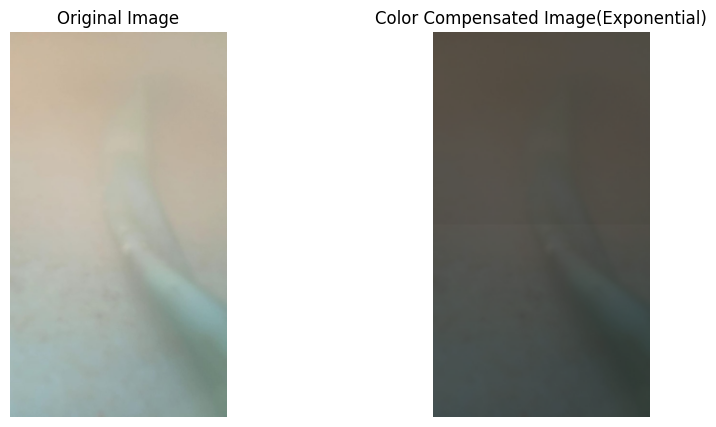

In [ ]:
import cv2
# Perform color compensation
# Load the image using OpenCV
image = cv2.imread('/content/WhatsApp Image 2024-09-18 at 14.23.13.jpeg') # Assuming the image file is named 'image.jpg'. Please replace with the actual file name.

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    compensated_image_exponential = compensate_color_exponential(image)
    # Convert BGR to RGB for displaying with matplotlib
    compensated_image_rgb_exponential = cv2.cvtColor(compensated_image_exponential, cv2.COLOR_BGR2RGB)
    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the original and compensated images side by side using matplotlib
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(compensated_image_rgb_exponential)
    plt.title('Color Compensated Image(Exponential)')
    plt.axis('off')

    plt.show()

In [ ]:
#CALCULATING SNR OF THE IMAGES
def calculate_snr(image):
    """
    Function to calculate the Signal-to-Noise Ratio (SNR) of an image.

    Parameters:
    - image: Input image (grayscale or color).

    Returns:
    - snr: Signal-to-Noise Ratio (SNR) value.
    """

    # Convert to grayscale if image is in color
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image

    # Compute the mean (signal) and the standard deviation (noise)
    mean_signal = np.mean(image_gray)  # Mean intensity value (signal)
    std_noise = np.std(image_gray)     # Standard deviation (noise)

    # Calculate SNR
    snr = mean_signal / std_noise

    return snr

In [ ]:
calculate_snr(original_image_rgb)

13.938539027066318

In [ ]:
calculate_snr(compensated_image_rgb_exponential)

14.830361085329516

In [ ]:
def compensate_color_logarithmic(image, alpha_R=0.5, alpha_G=0.1, alpha_B=0.1, depth_map=None):
    """
    Compensates for color attenuation in an underwater image.

    Parameters:
    - image: Input underwater image (in BGR format).
    - alpha_R, alpha_G, alpha_B: Attenuation coefficients for Red, Green, and Blue channels respectively.
    - depth_map: Estimated depth map of the image (optional). If None, a uniform depth will be assumed.

    Returns:
    - compensated_image: Color compensated image.
    """
    # Split the image into individual B, G, R channels
    B, G, R = cv2.split(image)

    # Get image dimensions
    height, width = image.shape[:2]

   # If no depth map is provided, assume a uniform depth for simplicity
    if depth_map is None:
       # Define pink and light blue in RGB
        pink = [255, 192, 203]  # RGB values for pink
        light_blue = [173, 216, 230]  # RGB values for light blue

     # Convert RGB to grayscale-like values to represent depth
        pink_depth_value = np.mean(pink) / 255.0  # Normalize to [0, 1] range
        blue_depth_value = np.mean(light_blue) / 255.0  # Normalize to [0, 1] range

    # Create the depth map
        depth_map = np.zeros((height, width))

    # Fill upper half with pink depth value
        depth_map[:height // 2, :] = pink_depth_value

    # Fill lower half with blue depth value
        depth_map[height // 2:, :] = blue_depth_value


    # Apply the compensation formula for each channel
    compensated_R = R * np.log(1-alpha_R*R* depth_map)
    compensated_G = G * np.log(1+alpha_G*G* depth_map)
    compensated_B = B * np.log(1+alpha_B*B* depth_map)

    # Clip the values to the valid range [0, 255] and convert back to uint8
    compensated_R = np.clip(compensated_R, 0, 255).astype(np.uint8)
    compensated_G = np.clip(compensated_G, 0, 255).astype(np.uint8)
    compensated_B = np.clip(compensated_B, 0, 255).astype(np.uint8)

    # Merge the compensated channels back together
    compensated_image = cv2.merge([compensated_B, compensated_G, compensated_R])

    return compensated_image

<ipython-input-48-c82a538743e7>:40: RuntimeWarning: invalid value encountered in log
  compensated_R = R * np.log(1-alpha_R*R* depth_map)
<ipython-input-48-c82a538743e7>:45: RuntimeWarning: invalid value encountered in cast
  compensated_R = np.clip(compensated_R, 0, 255).astype(np.uint8)


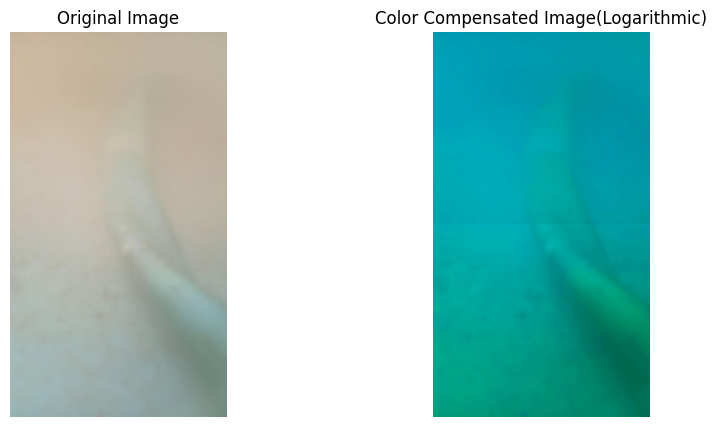

In [ ]:
# Perform color compensation
compensated_image_logarithmic = compensate_color_logarithmic(compensated_image_rgb_exponential)
# Convert BGR to RGB for displaying with matplotlib
compensated_image_rgb_logarithmic = cv2.cvtColor(compensated_image_logarithmic, cv2.COLOR_BGR2RGB)
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the original and compensated images side by side using matplotlib
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compensated_image_rgb_logarithmic)
plt.title('Color Compensated Image(Logarithmic)')
plt.axis('off')

plt.show()

In [ ]:
calculate_snr(compensated_image_rgb_logarithmic)

8.831115484563856

In [ ]:
def increase_contrast(image):
    """
    Increases the contrast of an image using Histogram Equalization.

    Parameters:
    - image: Input image (in BGR format).

    Returns:
    - contrast_image: Contrast-enhanced image.
    """
    # Check if the image is in color
    if len(image.shape) == 3 and image.shape[2] == 3:
        # Convert to YCrCb color space
        ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

        # Apply histogram equalization on the Y channel (luminance)
        ycrcb_image[:, :, 0] = cv2.equalizeHist(ycrcb_image[:, :, 0])

        # Convert back to BGR color space
        contrast_image = cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2BGR)
    else:
        # If the image is grayscale, apply histogram equalization directly
        contrast_image = cv2.equalizeHist(image)

    return contrast_image

In [ ]:
contrast_image_after_log = increase_contrast(compensated_image_rgb_logarithmic)

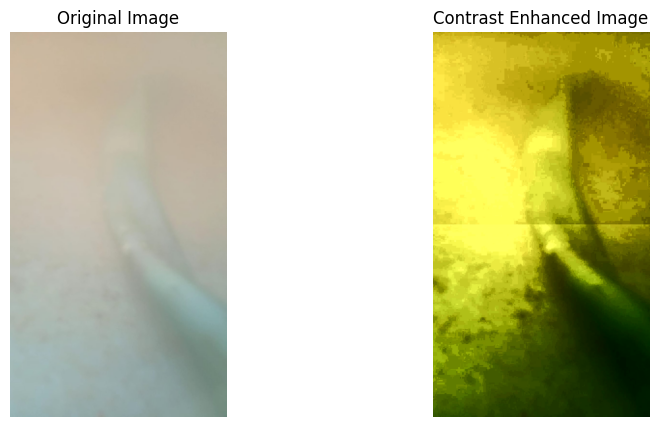

In [ ]:
# Display the original and contrast-enhanced images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrast_image_after_log, cv2.COLOR_BGR2RGB))
plt.title('Contrast Enhanced Image')
plt.axis('off')

plt.show()

In [ ]:
calculate_snr(contrast_image_after_log)

1.9266845732794315

In [ ]:
contrast_image = increase_contrast(image)

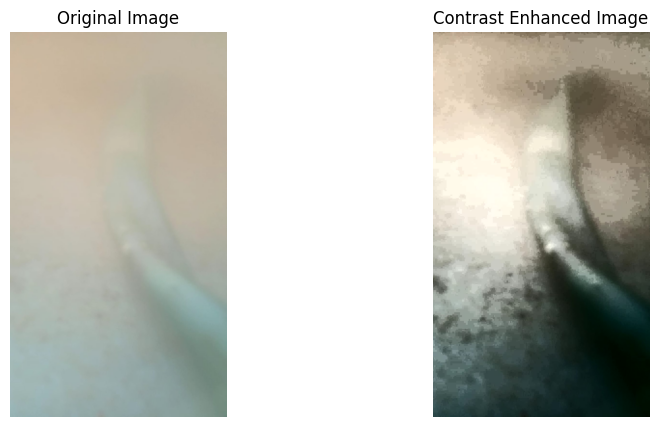

In [ ]:
# Display the original and contrast-enhanced images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
plt.title('Contrast Enhanced Image')
plt.axis('off')

plt.show()

In [ ]:
calculate_snr(contrast_image)

1.7681035186197438

In [ ]:
def increase_contrast_per_channel(image):
    """
    Increases the contrast of an image by applying histogram equalization to each color channel.

    Parameters:
    - image: Input image (in BGR format).

    Returns:
    - contrast_image: Contrast-enhanced image.
    """
    # Split the image into its BGR channels
    channels = cv2.split(image)

    # Apply histogram equalization to each channel
    equalized_channels = [cv2.equalizeHist(channel) for channel in channels]

    # Merge the channels back into a single image
    contrast_image = cv2.merge(equalized_channels)

    return contrast_image


In [ ]:
contrast_image_new = increase_contrast_per_channel(image)

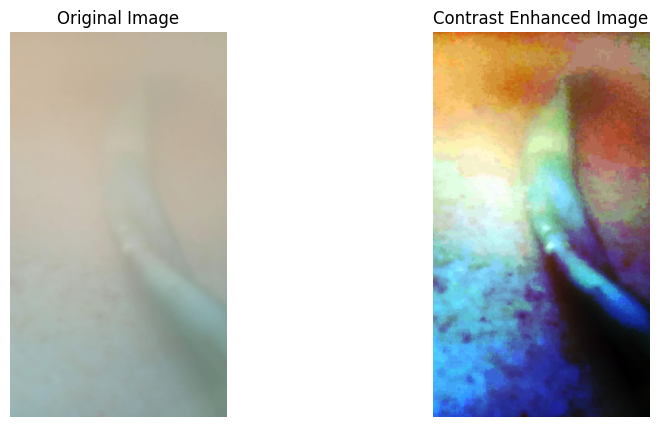

In [ ]:
# Display the original and contrast-enhanced images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrast_image_new, cv2.COLOR_BGR2RGB))
plt.title('Contrast Enhanced Image')
plt.axis('off')

plt.show()

In [ ]:
calculate_snr(contrast_image_new)

1.9465012323264155

In [ ]:

def compensate_color_hyperbolic(image, alpha_R=3, alpha_G=1, alpha_B=1, depth_map=None):
    """
    Compensates for color attenuation in an underwater image.

    Parameters:
    - image: Input underwater image (in BGR format).
    - alpha_R, alpha_G, alpha_B: Attenuation coefficients for Red, Green, and Blue channels respectively.
    - depth_map: Estimated depth map of the image (optional). If None, a uniform depth will be assumed.

    Returns:
    - compensated_image: Color compensated image.
    """
    # Split the image into individual B, G, R channels
    B, G, R = cv2.split(image)

    # Get image dimensions
    height, width = image.shape[:2]

    # If no depth map is provided, assume a uniform depth for simplicity
    if depth_map is None:
       # Define pink and light blue in RGB
        pink = [255, 192, 203]  # RGB values for pink
        light_blue = [173, 216, 230]  # RGB values for light blue

     # Convert RGB to grayscale-like values to represent depth
        pink_depth_value = np.mean(pink) / 255.0  # Normalize to [0, 1] range
        blue_depth_value = np.mean(light_blue) / 255.0  # Normalize to [0, 1] range

    # Create the depth map
        depth_map = np.zeros((height, width))

    # Fill upper half with pink depth value
        depth_map[:height // 2, :] = pink_depth_value

    # Fill lower half with blue depth value
        depth_map[height // 2:, :] = blue_depth_value


    # Apply the compensation formula for each channel
    compensated_R = R * np.tanh(-alpha_R * depth_map)
    compensated_G = G * np.tanh(alpha_G * depth_map)
    compensated_B = B * np.tanh(alpha_B * depth_map)

    # Clip the values to the valid range [0, 255] and convert back to uint8
    compensated_R = np.clip(compensated_R, 0, 255).astype(np.uint8)
    compensated_G = np.clip(compensated_G, 0, 255).astype(np.uint8)
    compensated_B = np.clip(compensated_B, 0, 255).astype(np.uint8)

    # Merge the compensated channels back together
    compensated_image = cv2.merge([compensated_B, compensated_G, compensated_R])

    return compensated_image

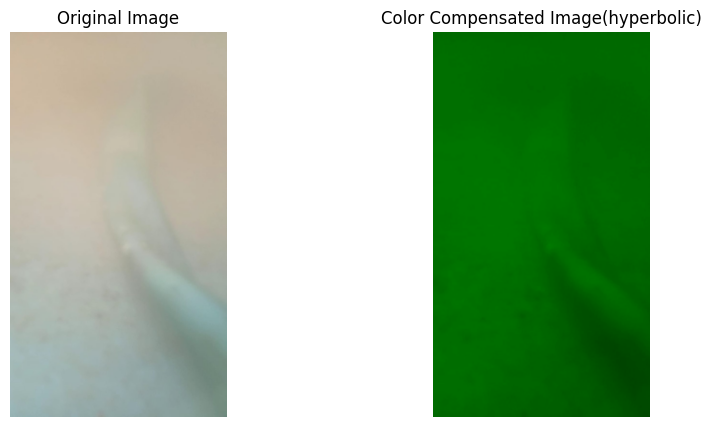

In [ ]:
# Perform color compensation
compensated_image_hyperbolic = compensate_color_hyperbolic(compensated_image_rgb_logarithmic)
# Convert BGR to RGB for displaying with matplotlib
compensated_image_rgb_hyperbolic = cv2.cvtColor(compensated_image_hyperbolic, cv2.COLOR_BGR2RGB)
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the original and compensated images side by side using matplotlib
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compensated_image_rgb_hyperbolic)
plt.title('Color Compensated Image(hyperbolic)')
plt.axis('off')

plt.show()

In [ ]:
def compensate_color_linear(image, alpha_R=1.2, alpha_G=0.2, alpha_B=0.2, depth_map=None):
    """
    Compensates for color attenuation in an underwater image using a linear function.

    Parameters:
    - image: Input underwater image (in BGR format).
    - alpha_R, alpha_G, alpha_B: Attenuation coefficients for Red, Green, and Blue channels respectively.
    - depth_map: Estimated depth map of the image (optional). If None, a uniform depth will be assumed.

    Returns:
    - compensated_image: Color compensated image.
    """
    # Split the image into individual B, G, R channels
    B, G, R = cv2.split(image)

    # Get image dimensions
    height, width = image.shape[:2]

   # If no depth map is provided, assume a uniform depth for simplicity
    if depth_map is None:
       # Define pink and light blue in RGB
        pink = [255, 192, 203]  # RGB values for pink
        light_blue = [173, 216, 230]  # RGB values for light blue

     # Convert RGB to grayscale-like values to represent depth
        pink_depth_value = np.mean(pink) / 255.0  # Normalize to [0, 1] range
        blue_depth_value = np.mean(light_blue) / 255.0  # Normalize to [0, 1] range

    # Create the depth map
        depth_map = np.zeros((height, width))

    # Fill upper half with pink depth value
        depth_map[:height // 2, :] = pink_depth_value

    # Fill lower half with blue depth value
        depth_map[height // 2:, :] = blue_depth_value


    # Apply the linear compensation formula for each channel
    compensated_R = R + alpha_R * R * depth_map
    compensated_G = G + alpha_G * G * depth_map
    compensated_B = B + alpha_B * B * depth_map

    # Clip the values to the valid range [0, 255] and convert back to uint8
    compensated_R = np.clip(compensated_R, 0, 255).astype(np.uint8)
    compensated_G = np.clip(compensated_G, 0, 255).astype(np.uint8)
    compensated_B = np.clip(compensated_B, 0, 255).astype(np.uint8)

    # Merge the compensated channels back together
    compensated_image = cv2.merge([compensated_B, compensated_G, compensated_R])

    return compensated_image


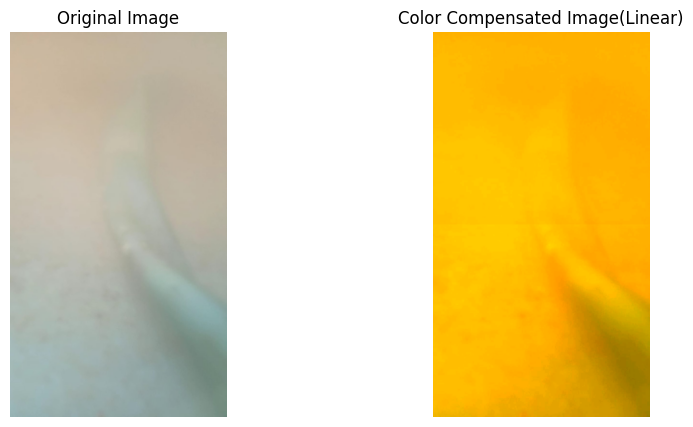

In [ ]:
# Perform color compensation
compensated_image_linear = compensate_color_linear(compensated_image_rgb_logarithmic)
# Convert BGR to RGB for displaying with matplotlib
compensated_image_rgb_linear = cv2.cvtColor(compensated_image_linear, cv2.COLOR_BGR2RGB)
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the original and compensated images side by side using matplotlib
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compensated_image_rgb_linear)
plt.title('Color Compensated Image(Linear)')
plt.axis('off')

plt.show()